In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split

In [51]:
# CONFIGURACIÓN
SEED = 42
pd.set_option('display.max_columns', None)

UMBRAL_CORTE = 0.4

# RUTA A LA CARPETA DE DATOS
DATA_DIR = 'Data/'



In [52]:
# Archivos

MODELOCL = 'CL'
MODELOAR = 'DOMAR'
MODELOPE = 'DOMPE'
MODELOCO = 'DOMCO'
MODELOIN = 'INTER'


In [53]:
# Parámetros Modelo GENERAL (Optimizados)
PARAMS_GENERAL = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
        "n_estimators": 3400,
        "learning_rate": 0.00691672678053923,
        "max_depth": 8,
        "min_child_weight": 2,
        "subsample": 0.70040916883059,
        "colsample_bytree": 0.6336372737535174,
        "gamma": 4.444773501115239,
        "reg_alpha": 0.0364624837974602,
        "reg_lambda": 9.704572224997422,
        "scale_pos_weight": 2.636601227452452,
        "colsample_bylevel": 0.6165801944134792,
        "max_delta_step": 8
    }

# Parámetros Modelo CHILE (Optimizados)
PARAMS_CHILE = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
        "n_estimators": 2200,
        "learning_rate": 0.019391819588103883,
        "max_depth": 8,
        "min_child_weight": 1,
        "subsample": 0.9752595713301466,
        "colsample_bytree": 0.6328798712612868,
        "gamma": 2.9814556867287916,
        "reg_alpha": 6.387337415800881,
        "reg_lambda": 1.1820890927398913,
        "scale_pos_weight": 2.011233074090613,
        "colsample_bylevel": 0.6400362283520091,
        "max_delta_step": 8
    }

PARAMS_PERU = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
        "n_estimators": 3100,
        "learning_rate": 0.009235446685142758,
        "max_depth": 10,
        "min_child_weight": 4,
        "subsample": 0.9017111792136994,
        "colsample_bytree": 0.6743347806102663,
        "gamma": 4.297137520936097,
        "reg_alpha": 3.7448303335872772,
        "reg_lambda": 0.15238863400797806,
        "scale_pos_weight": 2.201108125519425,
        "colsample_bylevel": 0.6655298507617331,
        "max_delta_step": 3
    }
PARAMS_ARGENTINA = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
        "n_estimators": 1000,
        "learning_rate": 0.018998851797390533,
        "max_depth": 3,
        "min_child_weight": 5,
        "subsample": 0.6747902887051281,
        "colsample_bytree": 0.7516384622236544,
        "gamma": 4.470409712877202,
        "reg_alpha": 0.04101651068522135,
        "reg_lambda": 6.219491591918364,
        "scale_pos_weight": 3.843229634647292,
        "colsample_bylevel": 0.8089365029457853,
        "max_delta_step": 8
    }
PARAMS_COLOMBIA = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
        "n_estimators": 4300,
        "learning_rate": 0.010471126653741473,
        "max_depth": 4,
        "min_child_weight": 4,
        "subsample": 0.8596201893305959,
        "colsample_bytree": 0.6815054348181652,
        "gamma": 4.754798017045593,
        "reg_alpha": 0.1078806769711471,
        "reg_lambda": 6.518705024436593,
        "scale_pos_weight": 3.3804314446366885,
        "colsample_bylevel": 0.7867103909203,
        "max_delta_step": 0
    }


parametros = {
    "General": PARAMS_GENERAL,
    "Chile": PARAMS_CHILE,
    "Peru": PARAMS_PERU,
    "Argentina": PARAMS_ARGENTINA,
    "Colombia": PARAMS_COLOMBIA,
}


In [54]:
def entrenar_modelo_visual(X_train, X_test, y_train, y_test, nombre_modelo, params_fijos, top_n_importance=15):
    print(f" PROCESANDO MODELO: {nombre_modelo}")

    # 1. Configuración y Entrenamiento del XGBoost
    model = XGBClassifier(**params_fijos)
    print("-> Entrenando XGBoost...")
    model.fit(X_train, y_train)

    # 2. Evaluación
    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs > UMBRAL_CORTE).astype(int)
    auc = roc_auc_score(y_test, probs)

    precision_1 = precision_score(y_test, preds, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_test, preds, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_test, preds, pos_label=1, zero_division=0)

    precision_0 = precision_score(y_test, preds, pos_label=0, zero_division=0)
    recall_0 = recall_score(y_test, preds, pos_label=0, zero_division=0)
    f1_0 = f1_score(y_test, preds, pos_label=0, zero_division=0)

    print(f"\n--- RESULTADOS: {nombre_modelo} ---")
    print(f"ROC-AUC: {auc:.4f}")
    print(classification_report(y_test, preds, target_names=['Ocio (0)', 'Trabajo (1)']))

    metrics = {
        'ROC-AUC': auc,
        'Precision_1': precision_1, 'Recall_1': recall_1, 'F1-Score_1': f1_1,
        'Precision_0': precision_0, 'Recall_0': recall_0, 'F1-Score_0': f1_0
    }

    # 3. Gráficos (Matriz y ROC)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ocio', 'Trabajo'])
    disp.plot(ax=ax[0], cmap='Blues', values_format='d')

    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1], name=nombre_modelo)
    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_title(f'Curva ROC - {nombre_modelo}')
    ax[0].grid(False)
    plt.tight_layout()
    plt.show()

    # 4. Gráfica de importancia de features (si el modelo la tiene)
    try:
        if hasattr(model, 'feature_importances_'):
            feat_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"f_{i}" for i in range(X_train.shape[1])]
            importances = model.feature_importances_
            df_imp = pd.DataFrame({'feature': feat_names, 'importance': importances})
            df_imp = df_imp.sort_values('importance', ascending=False).head(top_n_importance)

            # plot horizontal bar with annotations
            fig2, ax2 = plt.subplots(figsize=(10, max(4, 0.4 * len(df_imp))))
            df_imp_plot = df_imp[::-1]  # invertir para que la más importante quede arriba
            bars = ax2.barh(df_imp_plot['feature'], df_imp_plot['importance'], color='C0')
            ax2.set_xlabel('Importancia')
            ax2.set_title(f'Importancia de features - {nombre_modelo} (top {len(df_imp)})')

            # Anotar cada barra (usa bar_label si disponible)
            try:
                ax2.bar_label(bars, fmt='%.3f', padding=6)
            except Exception:
                max_w = df_imp['importance'].max() if len(df_imp) else 1.0
                x_off = max_w * 0.01
                for bar in bars:
                    w = bar.get_width()
                    ax2.text(w + x_off, bar.get_y() + bar.get_height() / 2, f'{w:.3f}', va='center', ha='left', fontsize=9)

            plt.tight_layout()
            plt.show()
        else:
            print("Aviso: el modelo no tiene `feature_importances_`, no se genera la gráfica de importancia.")
    except Exception as e:
        print("No se pudo generar la gráfica de importancia:", e)

    # 5. Devolver el modelo entrenado y las métricas
    return model, metrics

In [55]:
def matriz_correlacion_por_modelo(model_or_pipeline, X, feature_names=None, top_n=None,
                                  method='pearson', figsize=(24,12), cmap='coolwarm',
                                  target_name=None):
    """
    Genera y devuelve la matriz de correlación de las features asociadas a un modelo.
    - model_or_pipeline: estimador o Pipeline (con 'scaler' opcional y/o 'model').
    - X: pd.DataFrame o np.ndarray con las mismas columnas usadas por el modelo.
    - feature_names: lista opcional de nombres de features (si X es array).
    - top_n: si se proporciona, selecciona las top_n features por importancia (coef_ o feature_importances_).
    - method: 'pearson', 'spearman', etc.
    - target_name: nombre de la columna objetivo para eliminarla si X la contiene.
    Retorna: pd.DataFrame con la matriz de correlación.
    """
    # 1. Preparar DataFrame
    if isinstance(X, pd.DataFrame):
        df_X = X.copy()
    else:
        if feature_names is None:
            feature_names = [f"f_{i}" for i in range(X.shape[1])]
        df_X = pd.DataFrame(X, columns=feature_names)

    # eliminar columna target si está presente
    if target_name is not None and target_name in df_X.columns:
        df_X = df_X.drop(columns=[target_name])

    # 2. Si es Pipeline, intentar aplicar scaler y extraer modelo final
    model = model_or_pipeline
    if isinstance(model_or_pipeline, Pipeline):
        # aplicar scaler si existe
        if 'scaler' in model_or_pipeline.named_steps:
            scaler = model_or_pipeline.named_steps['scaler']
            try:
                X_scaled = scaler.transform(df_X)
                df_X = pd.DataFrame(X_scaled, columns=df_X.columns)
            except Exception:
                pass
        # obtener estimador final si está nombrado 'model'
        model = model_or_pipeline.named_steps.get('model', model_or_pipeline)

    # 3. Selección top_n según coef_ o feature_importances_
    df_sel = df_X.copy()
    if top_n is not None:
        importances = None
        if hasattr(model, 'coef_'):
            try:
                importances = np.ravel(model.coef_)
            except Exception:
                importances = None
        if importances is None and hasattr(model, 'feature_importances_'):
            importances = np.ravel(model.feature_importances_)
        if importances is not None:
            # si hay desajuste de tamaño, truncar al mínimo
            if len(importances) != df_X.shape[1]:
                n = min(len(importances), df_X.shape[1])
                importances = importances[:n]
                df_sel = df_X.iloc[:, :n]
            # seleccionar top_n por importancia absoluta
            idx = np.argsort(np.abs(importances))[::-1][:top_n]
            selected_cols = [df_sel.columns[i] for i in idx]
            df_sel = df_sel[selected_cols]
        else:
            print("WARNING: el modelo no tiene 'coef_' ni 'feature_importances_'. Se usarán todas las features.")

    # 4. Calcular matriz de correlación y plot
    corr = df_sel.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1,
                square=True, cbar_kws={'shrink': .8}, annot_kws={'size':8})
    title_suffix = f"top_{top_n}" if top_n else "todas las features"
    plt.title(f"Matriz de correlación ({method}) - {title_suffix}")
    plt.tight_layout()
    plt.show()

    return corr

In [56]:
def graficar_importancia_features(pipeline, nombre_modelo, feature_names, top_n=15):
    # 1. Extraer modelo
    try:
        modelo_xgb = pipeline.named_steps['model']
    except KeyError:
        print(f"Error: No se encontró 'model' en el pipeline de {nombre_modelo}.")
        return

    # 2. Crear DataFrame de importancia usando los nombres de features proporcionados
    df_importancia = pd.DataFrame({
        'feature': feature_names,
        'importance': modelo_xgb.feature_importances_
    }).sort_values('importance', ascending=False).head(top_n)

    # 3. Graficar
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=df_importancia, palette='mako', hue='feature', legend=False)
    plt.title(f'Top {top_n} Características más Importantes - {nombre_modelo}')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

### Modelo General

Cargando datos para el Modelo General...
 PROCESANDO MODELO: General
-> Entrenando XGBoost...

--- RESULTADOS: General ---
ROC-AUC: 0.7956
              precision    recall  f1-score   support

    Ocio (0)       0.90      0.63      0.74      4551
 Trabajo (1)       0.42      0.81      0.55      1540

    accuracy                           0.67      6091
   macro avg       0.66      0.72      0.65      6091
weighted avg       0.78      0.67      0.69      6091



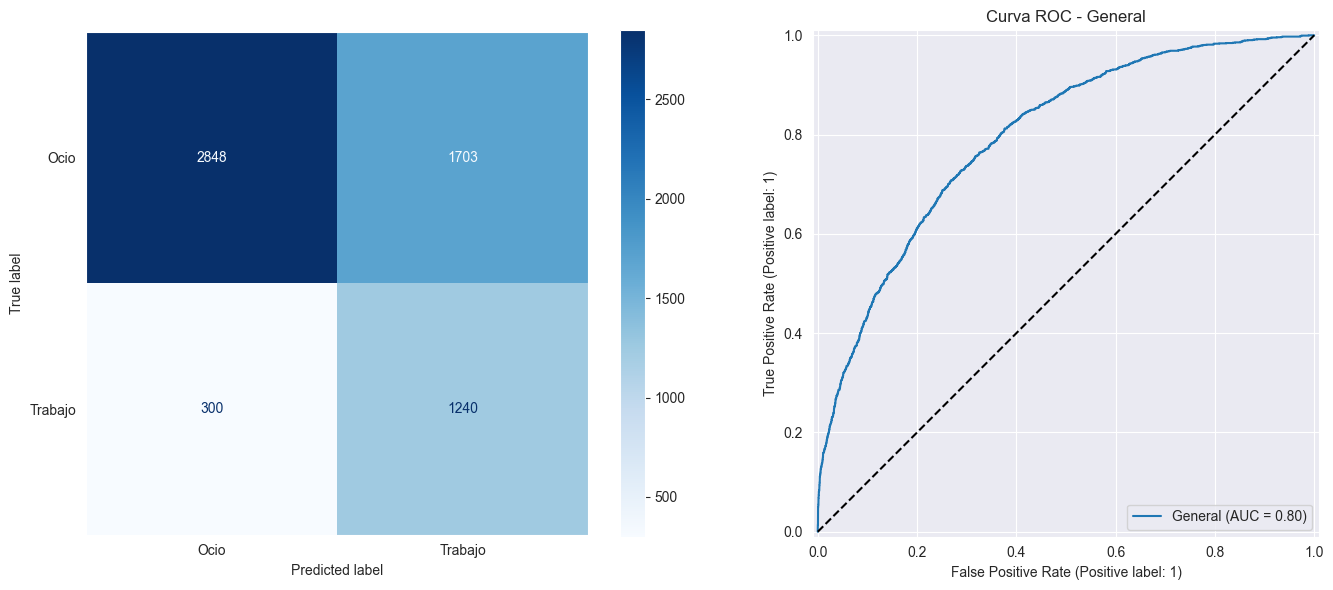

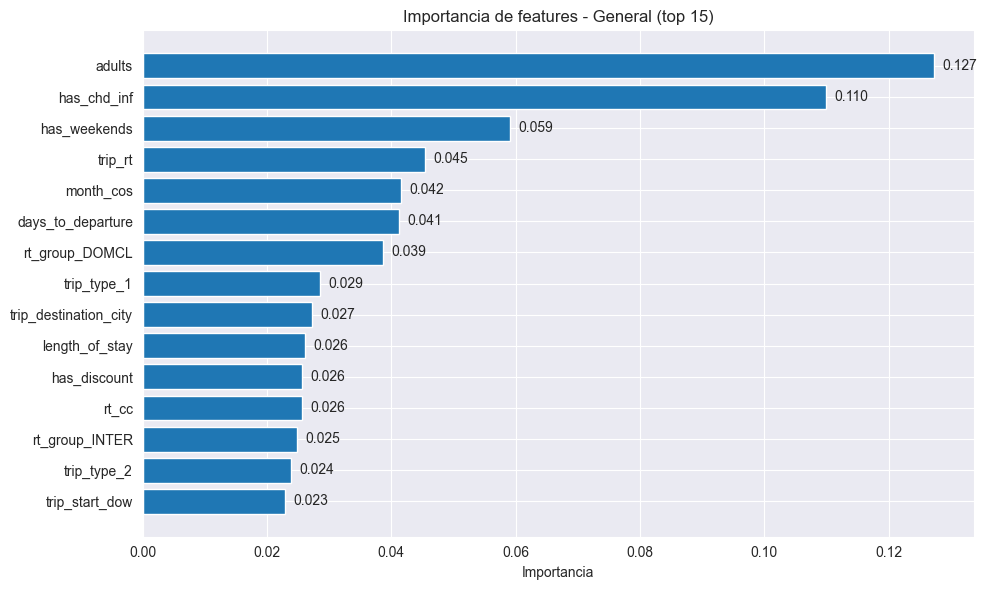

In [57]:
# --- Modelo General ---
print("Cargando datos para el Modelo General...")
X_train_gen = pd.read_parquet(f'{DATA_DIR}X_train_general_encoded.parquet')# .drop(['adults'], axis=1)
X_test_gen = pd.read_parquet(f'{DATA_DIR}X_test_general_encoded.parquet')# .drop(['adults'], axis=1)
y_train_gen = pd.read_pickle(f'{DATA_DIR}y_train_general.pkl')
y_test_gen = pd.read_pickle(f'{DATA_DIR}y_test_general.pkl')

modelo_general, metrics_general = entrenar_modelo_visual(
    X_train_gen, X_test_gen, y_train_gen, y_test_gen, "General", PARAMS_GENERAL
)

### Modelo Chile

Cargando datos para el Modelo Chile...
 PROCESANDO MODELO: Chile
-> Entrenando XGBoost...

--- RESULTADOS: Chile ---
ROC-AUC: 0.8545
              precision    recall  f1-score   support

    Ocio (0)       0.90      0.62      0.74       596
 Trabajo (1)       0.55      0.87      0.68       317

    accuracy                           0.71       913
   macro avg       0.73      0.75      0.71       913
weighted avg       0.78      0.71      0.72       913



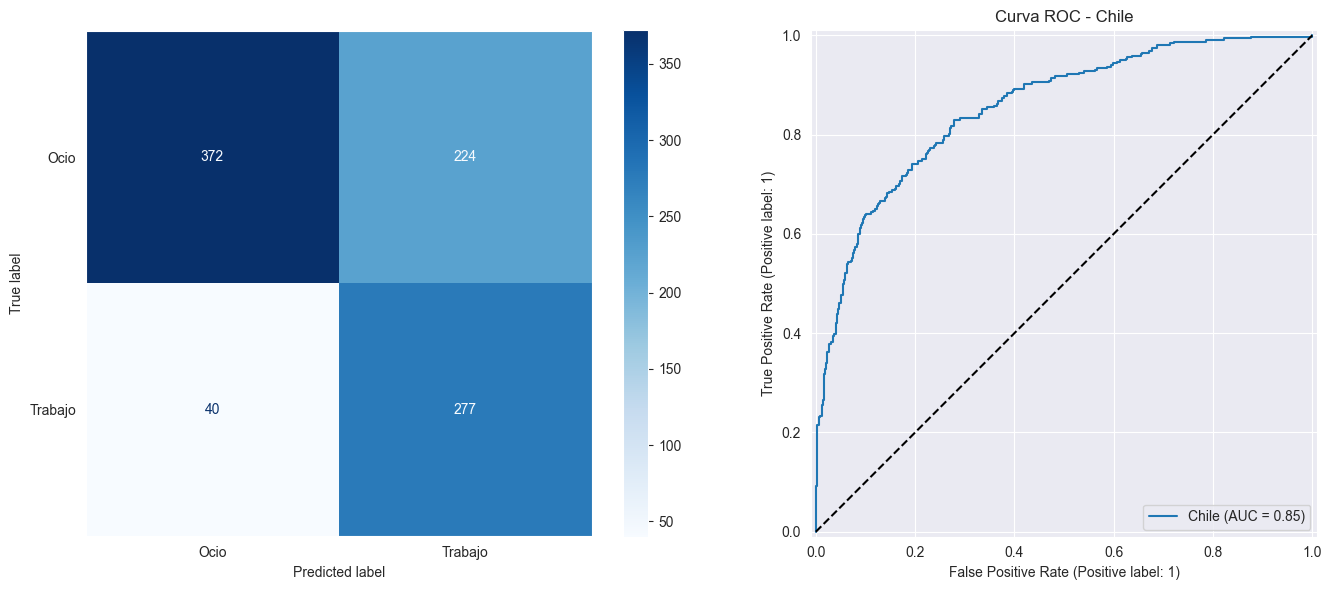

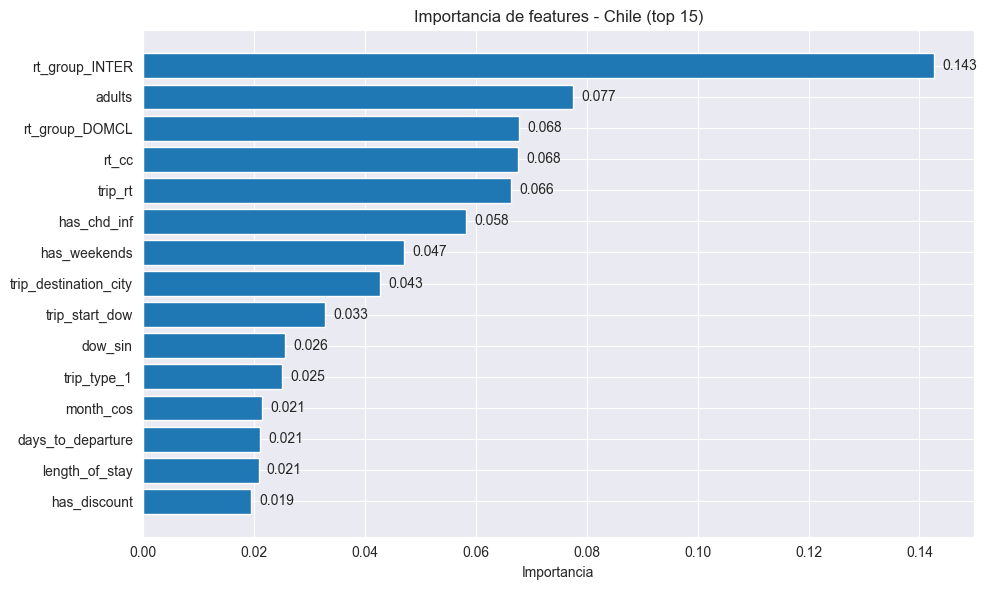

In [58]:
# --- Modelo Chile ---

print("Cargando datos para el Modelo Chile...")
X_train_cl = pd.read_parquet(f'{DATA_DIR}X_train_{MODELOCL}_encoded.parquet')
X_test_cl = pd.read_parquet(f'{DATA_DIR}X_test_{MODELOCL}_encoded.parquet')
y_train_cl = pd.read_pickle(f'{DATA_DIR}y_train_{MODELOCL}.pkl')
y_test_cl = pd.read_pickle(f'{DATA_DIR}y_test_{MODELOCL}.pkl')

modelo_chile, metrics_chile = entrenar_modelo_visual(
    X_train_cl, X_test_cl, y_train_cl, y_test_cl, "Chile", PARAMS_CHILE
)

In [59]:
# # --- Modelo INTER ---
#
# print("Cargando datos para el Modelo INTER...")
# X_train_in = pd.read_parquet(f'{DATA_DIR}X_train_{MODELOIN}_encoded.parquet')
# X_test_in = pd.read_parquet(f'{DATA_DIR}X_test_{MODELOIN}_encoded.parquet')
# y_train_in = pd.read_pickle(f'{DATA_DIR}y_train_{MODELOIN}.pkl')
# y_test_in = pd.read_pickle(f'{DATA_DIR}y_test_{MODELOIN}.pkl')
#
# modelo_inter, metrics_inter = entrenar_modelo_visual(
#     X_train_in, X_test_in, y_train_in, y_test_in, "Inter", PARAMS_GENERAL)

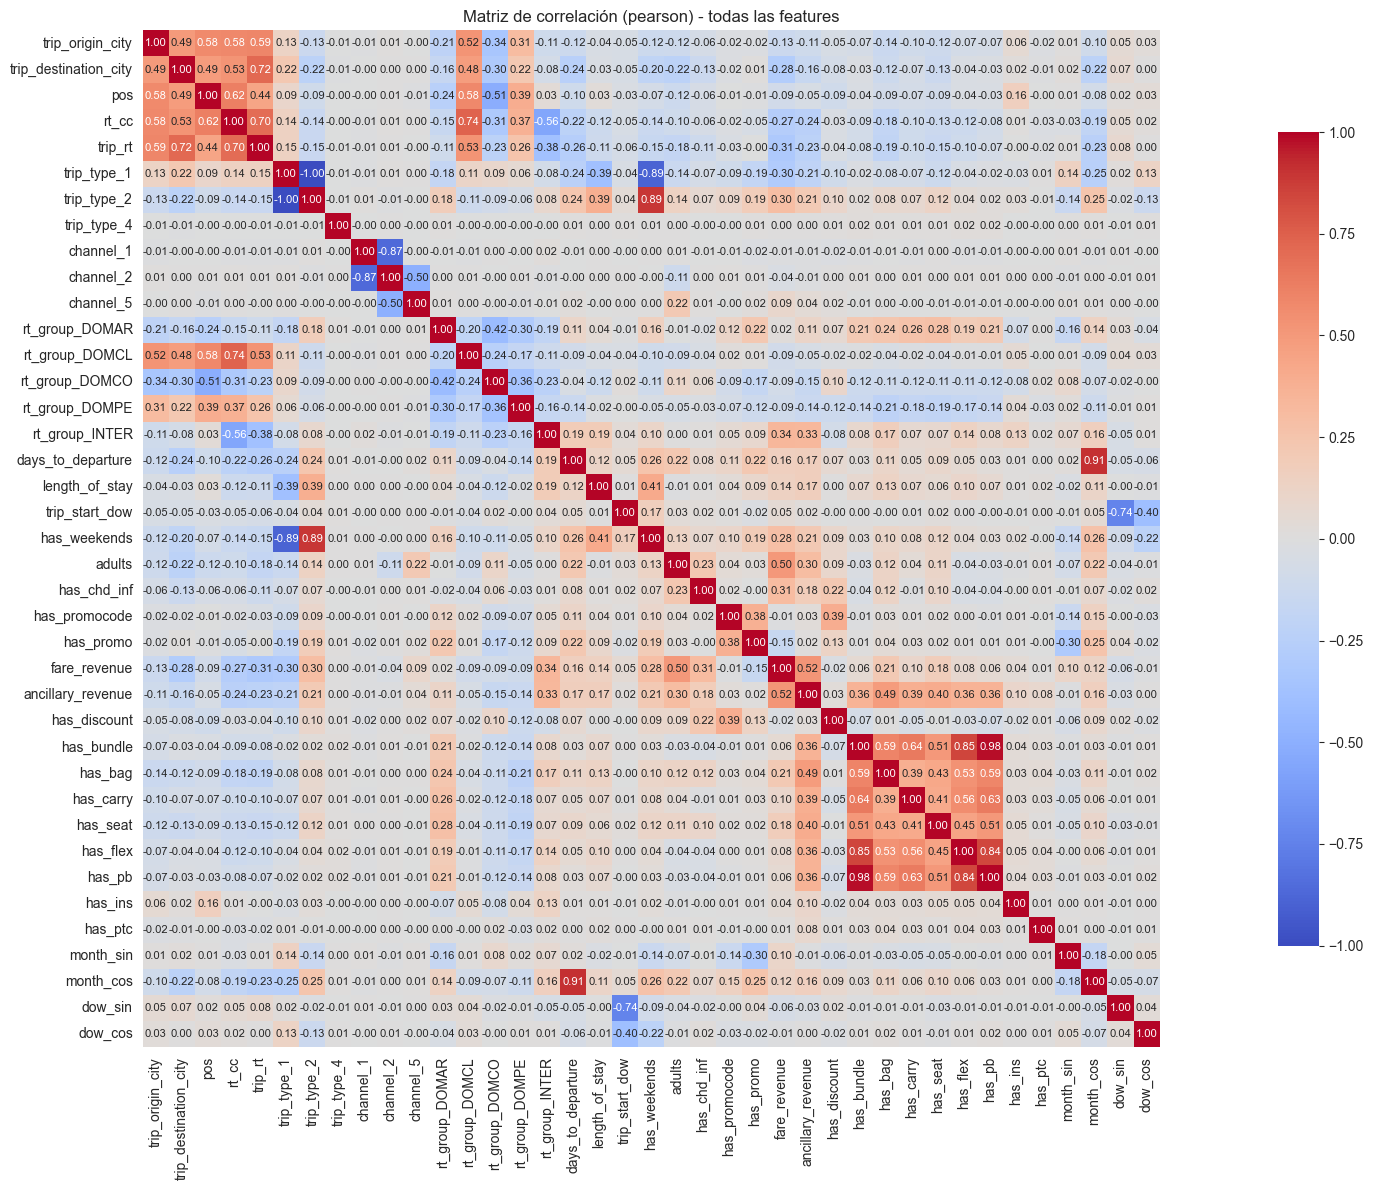

,trip_origin_city,trip_destination_city,pos,rt_cc,trip_rt,trip_type_1,trip_type_2,trip_type_4,channel_1,channel_2,channel_5,rt_group_DOMAR,rt_group_DOMCL,rt_group_DOMCO,rt_group_DOMPE,rt_group_INTER,days_to_departure,length_of_stay,trip_start_dow,has_weekends,adults,has_chd_inf,has_promocode,has_promo,fare_revenue,ancillary_revenue,has_discount,has_bundle,has_bag,has_carry,has_seat,has_flex,has_pb,has_ins,has_ptc,month_sin,month_cos,dow_sin,dow_cos
trip_origin_city,1.000000,0.492695,0.577408,0.582705,0.590402,0.128712,-0.128636,-0.005849,-0.009963,0.010793,-0.004325,-0.214407,0.523482,-0.337118,0.308345,-0.108893,-0.119168,-0.039271,-0.051014,-0.117632,-0.116566,-0.063973,-0.017280,-0.018548,-0.130587,-0.105669,-0.050720,-0.069810,-0.136736,-0.095685,-0.116606,-0.074913,-0.065745,0.056423,-0.019727,0.010785,-0.100965,0.052072,0.026747
trip_destination_city,0.492695,1.000000,0.485065,0.529607,0.718329,0.219315,-0.219207,-0.008398,-0.003507,0.001517,0.003040,-0.162713,0.478549,-0.299567,0.219508,-0.077152,-0.243650,-0.031706,-0.051612,-0.200447,-0.221058,-0.130209,-0.019673,0.010890,-0.279256,-0.155548,-0.077527,-0.030372,-0.122104,-0.069051,-0.129731,-0.037680,-0.026466,0.018087,-0.010751,0.018043,-0.221046,0.065515,0.000298
pos,0.577408,0.485065,1.000000,0.618509,0.443529,0.093903,-0.093869,-0.002606,-0.003554,0.007109,-0.008060,-0.243103,0.584017,-0.509095,0.391132,0.034357,-0.102312,0.025241,-0.031985,-0.071148,-0.124091,-0.057076,-0.005628,-0.012950,-0.087909,-0.050953,-0.094337,-0.037475,-0.093058,-0.070493,-0.087064,-0.038994,-0.032725,0.163482,-0.004431,0.005093,-0.079969,0.021467,0.032166
rt_cc,0.582705,0.529607,0.618509,1.000000,0.699566,0.140822,-0.140801,-0.001638,-0.014361,0.011754,0.001368,-0.151270,0.738017,-0.307907,0.370199,-0.561788,-0.223034,-0.124267,-0.048309,-0.135000,-0.104373,-0.057901,-0.020342,-0.049869,-0.273283,-0.241395,-0.034276,-0.085101,-0.182447,-0.104485,-0.125177,-0.122381,-0.081061,0.009796,-0.025171,-0.030617,-0.190136,0.054582,0.021165
trip_rt,0.590402,0.718329,0.443529,0.699566,1.000000,0.148299,-0.148203,-0.007458,-0.008597,0.007523,-0.000153,-0.108425,0.527128,-0.225459,0.256063,-0.380168,-0.261752,-0.112845,-0.064291,-0.150800,-0.177766,-0.113327,-0.031942,-0.003464,-0.306752,-0.226519,-0.035361,-0.078791,-0.194623,-0.103315,-0.148383,-0.101792,-0.074041,-0.003386,-0.016731,0.007790,-0.234569,0.076998,0.003596
trip_type_1,0.128712,0.219315,0.093903,0.140822,0.148299,1.000000,-0.999918,-0.006167,-0.011057,0.009278,0.000598,-0.179027,0.113965,0.092771,0.058929,-0.082547,-0.239552,-0.389069,-0.043352,-0.892461,-0.137550,-0.068721,-0.094280,-0.185605,-0.295817,-0.206694,-0.100187,-0.024314,-0.081722,-0.074342,-0.123025,-0.041598,-0.023320,-0.026268,0.005611,0.143221,-0.245635,0.021180,0.128586
trip_type_2,-0.128636,-0.219207,-0.093869,-0.140801,-0.148203,-0.999918,1.000000,-0.006655,0.011059,-0.009280,-0.000597,0.178887,-0.113937,-0.092712,-0.058887,0.082574,0.239411,0.389028,0.043220,0.892369,0.137514,0.068753,0.094302,0.185489,0.295788,0.206675,0.100054,0.024077,0.081581,0.074189,0.122905,0.041397,0.023088,0.026279,-0.005605,-0.143242,0.245450,-0.021086,-0.128669
trip_type_4,-0.005849,-0.008398,-0.002606,-0.001638,-0.007458,-0.006167,-0.006655,1.000000,-0.000174,0.000201,-0.000101,0.010827,-0.002194,-0.004559,-0.003258,-0.002065,0.010927,0.003101,0.010277,0.006910,0.002752,-0.002547,-0.001736,0.009032,0.002190,0.001418,0.010346,0.018409,0.010991,0.011868,0.009351,0.015692,0.018039,-0.000809,-0.000471,0.001676,0.014438,-0.007356,0.006523
channel_1,-0.009963,-0.003507,-0.003554,-0.014361,-0.008597,-0.011057,0.011059,-0.000174,1.000000,-0.865919,-0.000427,-0.005751,-0.009311,0.003033,-0.002609,0.017111,-0.007657,0.000559,-0.000646,0.002059,0.005616,-0.006409,-0.007369,-0.016085,-0.009488,-0.007826,-0.016838,-0.009463,-0.005434,-0.011065,0.000810,-0.011101,-0.009657,-0.003432,-0.001999,0.011290,-0.010560,0.005912,-0.003566
channel_2,0.010793,0.001517,0.007109,0.011754,0.007523,0.009278,-0.0092

In [60]:
matriz_correlacion_por_modelo(modelo_general, X_train_gen, target_name=y_train_gen.name)

In [69]:
# # python
# from sklearn.model_selection import StratifiedKFold, cross_val_predict
# from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
#                              confusion_matrix, classification_report, roc_curve, auc)
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd
#
# def entrenar_modelo_visual_full(df_or_path, target_col='trip_type',
#                                 params=PARAMS_GENERAL, cv_splits=5,
#                                 umbral_corte=UMBRAL_CORTE, top_n_importance=15,
#                                 random_state=SEED):
#     # aceptar DataFrame o ruta
#     if isinstance(df_or_path, str):
#         df = pd.read_parquet(df_or_path)
#     else:
#         df = df_or_path.copy()
#
#     if target_col not in df.columns:
#         raise ValueError(f"La columna target `{target_col}` no está en el DataFrame.")
#
#     X = df.drop(columns=[target_col])
#     y = df[target_col].copy()
#
#     # asegurar que target sea 0/1
#     if not set(pd.Series(y.dropna().unique()).tolist()).issubset({0, 1}):
#         # intentar mapear valores booleanos / strings comunes a 0/1 si aplica
#         if y.dtype == 'bool':
#             y = y.astype(int)
#         else:
#             raise ValueError("La columna target no parece binaria 0/1. Normalice antes de llamar.")
#
#     # encoding de categóricas
#     cat_cols = X.select_dtypes(include=['object', 'category']).columns
#     if len(cat_cols) > 0:
#         X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
#
#     X = X.reset_index(drop=True)
#     y = y.reset_index(drop=True)
#
#     # CV estratificado y predicciones probabilísticas agregadas
#     skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
#     model_cv = XGBClassifier(**params)
#     probs = cross_val_predict(model_cv, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
#     preds = (probs > umbral_corte).astype(int)
#
#     # métricas agregadas
#     auc_score = roc_auc_score(y, probs)
#     p1 = precision_score(y, preds, pos_label=1, zero_division=0)
#     r1 = recall_score(y, preds, pos_label=1, zero_division=0)
#     f1_1 = f1_score(y, preds, pos_label=1, zero_division=0)
#     p0 = precision_score(y, preds, pos_label=0, zero_division=0)
#     r0 = recall_score(y, preds, pos_label=0, zero_division=0)
#     f1_0 = f1_score(y, preds, pos_label=0, zero_division=0)
#
#     metrics = {
#         'ROC-AUC_aggregado': float(auc_score),
#         'Precision_1': float(p1), 'Recall_1': float(r1), 'F1_1': float(f1_1),
#         'Precision_0': float(p0), 'Recall_0': float(r0), 'F1_0': float(f1_0),
#         'n_samples': int(len(y))
#     }
#
#     print(f"--- RESULTADOS CV ({cv_splits} folds) ---")
#     print(f"ROC-AUC (agregado): {metrics['ROC-AUC_aggregado']:.4f}")
#     print(classification_report(y, preds, zero_division=0))
#
#     # Gráficos: matriz de confusión y ROC
#     cm = confusion_matrix(y, preds)
#     fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
#     ax[0].set_xlabel('Predicción')
#     ax[0].set_ylabel('Verdadero')
#     ax[0].set_title('Matriz de Confusión (CV agregada)')
#
#     fpr, tpr, _ = roc_curve(y, probs)
#     ax[1].plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
#     ax[1].plot([0, 1], [0, 1], 'k--', alpha=0.6)
#     ax[1].set_xlabel('FPR'); ax[1].set_ylabel('TPR')
#     ax[1].set_title('Curva ROC (CV agregada)')
#     ax[1].legend()
#     plt.tight_layout()
#     plt.show()
#
#     # Entrenar modelo final con el 100% de los datos
#     model_final = XGBClassifier(**params)
#     model_final.fit(X, y)
#
#     # Importancia de features
#     try:
#         if hasattr(model_final, 'feature_importances_'):
#             feat_names = X.columns.tolist()
#             importances = model_final.feature_importances_
#             df_imp = pd.DataFrame({'feature': feat_names, 'importance': importances})
#             df_imp = df_imp.sort_values('importance', ascending=False).head(top_n_importance)
#
#             plt.figure(figsize=(10, max(4, 0.4 * len(df_imp))))
#             sns.barplot(x='importance', y='feature', data=df_imp, palette='mako', orient='h')
#             plt.title(f'Importancia features (top {len(df_imp)})')
#             plt.xlabel('Importancia')
#             plt.tight_layout()
#             plt.show()
#     except Exception as e:
#         print("Aviso: no se pudo graficar importancias:", e)
#
#     return model_final, metrics
#
# df_full = pd.read_parquet('Data/df_full.parquet')
# model_final = entrenar_modelo_visual_full(df_full, target_col='target')